- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [102]:
data = data[['sepal length (cm)','sepal width (cm)']]

In [153]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.33)

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [155]:
lda = LinearDiscriminantAnalysis()

In [156]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [157]:
lda.predict(X_test)

array([2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0,
       2, 0, 0, 2, 0, 0])

In [158]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [159]:
result

,0,1
0,2,2
1,2,2
2,2,2
3,2,1
4,1,1
5,1,2
6,2,1
7,0,0
8,0,0
9,2,2


In [160]:
from sklearn.metrics import accuracy_score

In [161]:
accuracy_score(y_test, lda.predict(X_test))

0.74

In [162]:
X_train

,sepal length (cm),sepal width (cm)
11,4.8,3.4
34,4.9,3.1
129,7.2,3.0
13,4.3,3.0
109,7.2,3.6
...,...,...
89,5.5,2.5
38,4.4,3.0
148,6.2,3.4
86,6.7,3.1


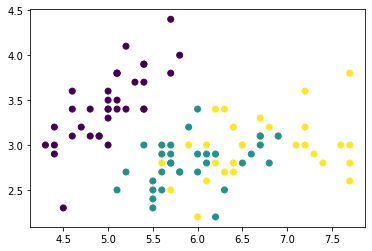

In [163]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [164]:
small_train = X_train[(y_train == 1) | (y_train == 0)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 1) | (y_train == 0)]
small_test = X_test[(y_test == 1) | (y_test == 0)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 1) | (y_test == 0)]

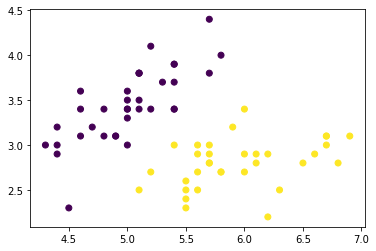

In [165]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [166]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [167]:
lda_small.means_

array([[5.00857143, 3.44571429],
       [5.94545455, 2.7969697 ]])

<ipython-input-94-f28b672bf64f>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


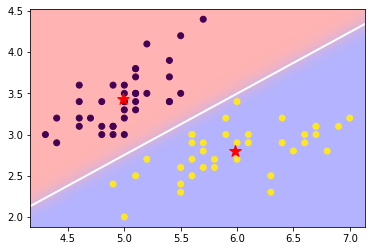

In [94]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [95]:
lda_small.coef_

array([[ 11.53690604, -15.48111902]])

In [96]:
accuracy_score(sy_test, lda_small.predict(small_test))

0.96

Кластера

In [121]:
X = data
y = data_class

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [125]:
X_scaled = scaler.fit_transform(X)

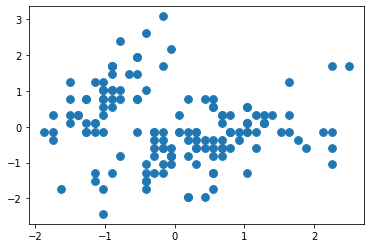

In [114]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [115]:
from sklearn.cluster import KMeans

In [131]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

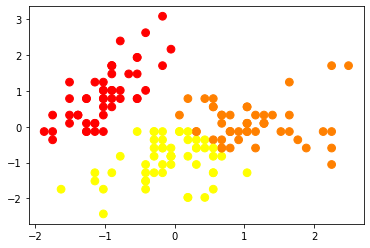

In [132]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [133]:
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

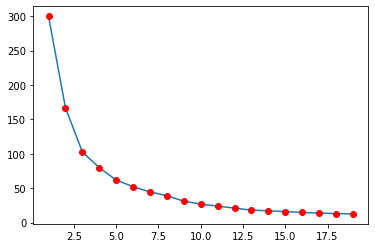

In [130]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

оптимально 3 кластера